---

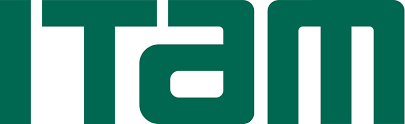

In [2]:
# Inicio de M para usuarios.
from IPython.core.display import Image, display
from tqdm import tqdm
display(Image('C:/Users/mb55292/Documents/ITAM/Itam_logo.png', width=500, unconfined=True))

---

<font color='#508072'> 
$ \Large \textbf {Data science and machine learning applied to financial markets} $

<font color='#508072'> 
$ \normalsize \textbf {Author: Daniel Omar Becerril Olguín} $

<font color='#508072'> 
$ \normalsize \textbf {CU: 183605} $

---

## Prerequisites

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (12, 3)

In [9]:
bmv = pd.read_csv("../files/lec02/ipc0019.csv")
bmv.head()

,date,ticker,field,value
0,2017-06-07,BBAJIOO MF Equity,PX_LAST,29.50
1,2017-06-08,BBAJIOO MF Equity,PX_LAST,30.14
2,2017-06-08,BBAJIOO MF Equity,PX_LOW,29.75
3,2017-06-08,BBAJIOO MF Equity,PX_OPEN,29.50
4,2017-06-08,BBAJIOO MF Equity,PX_HIGH,30.70


In [10]:
bmv = bmv.pivot_table(values="value",
                      index="date",
                      columns=["ticker", "field"])
bmv.head()

ticker     1746531D GZ Equity                                          \
field                 PX_HIGH PX_LAST PX_LOW PX_MID PX_OPEN PX_VOLUME   
date                                                                    
2000-01-03                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-04                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-05                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-06                NaN     NaN    NaN    NaN     NaN       NaN   
2000-01-07                NaN     NaN    NaN    NaN     NaN       NaN   

ticker     AC* MF Equity                        ... TLEVICPO MF Equity         \
field            PX_HIGH PX_LAST PX_LOW PX_MID  ...             PX_LOW PX_MID   
date                                            ...                             
2000-01-03           NaN     NaN    NaN    NaN  ...              30.44  30.50   
2000-01-04           NaN     NaN    NaN    NaN  ...              27.30  27.45   
2000-01-05           NaN     NaN    NaN    NaN  ...              25.90  27.15   
2000-01-06           NaN     NaN    NaN    NaN  ...              27.00  27.08   
2000-01-07           NaN     NaN    NaN    NaN  ...              26.75  28.35   

ticker                        WALMEX* MF Equity                                \
field      PX_OPEN  PX_VOLUME           PX_HIGH PX_LAST PX_LOW PX_MID PX_OPEN   
date                                                                            
2000-01-03   32.20   680000.0              5.14    4.90   4.75   4.89    4.78   
2000-01-04   28.80  2980000.0              4.83    4.82   4.73   4.83    4.80   
2000-01-05   26.80  3430000.0              5.25    5.21   4.70   5.30    4.80   
2000-01-06   27.30   850000.0              5.34    5.18   5.13   5.18    5.24   
2000-01-07   26.98  2210000.0              5.63    5.51   5.19   5.69    5.19   

ticker                  
field        PX_VOLUME  
date                    
2000-01-03  17132000.0  
2000-01-04  20296000.0  
2000-01-05  20372000.0  
2000-01-06  22904000.0  
2000-01-07  23512000.0  

[5 rows x 210 columns]

In [16]:
base_CEMEX = bmv['CEMEXCPO MF Equity']

In [17]:
base_CEMEX

field,PX_HIGH,PX_LAST,PX_LOW,PX_MID,PX_OPEN,PX_VOLUME
date,,,,,,
2000-01-03,8.46,8.14,8.09,8.14,8.35,8755188.0
2000-01-04,7.89,7.62,7.61,7.61,7.86,26017417.0
2000-01-05,7.70,7.61,7.45,7.65,7.61,39735576.0
2000-01-06,7.71,7.50,7.43,7.50,7.65,14939813.0
2000-01-07,7.59,7.58,7.48,7.58,7.54,46276516.0
...,...,...,...,...,...,...
2019-09-20,8.02,7.98,7.74,8.00,7.79,171300571.0
2019-09-23,7.98,7.84,7.77,7.84,7.97,18713400.0
2019-09-24,7.86,7.79,7.76,7.78,7.85,16686571.0


---

<h2 style="color:crimson">Ejercicios</h2>

En los ejercicios 1 a 5 analizaremos la volatilidad CEMEX (`"CEMEXCPO MF Equity"`).

1. Declara la variable `cemex_close` siendo esta la columna `PX_LAST` dentro del DataFrame `bmv`; transforma el índice de `cemex_close` a fin de que sea un `DateTimeIndex`; posteriormente, declara la variable `cemex_diff` que contenga la diferencia de precios entre un día y el siguiente (**hint**: ocupa el método `shift`)

Crea una figure usando matplotlib con 2 columnas: la primera columna deberá ser el histórico de `cemex_diff`; la segunda columna, un histograma de `cemex_diff` con `bins=20`.

**Solución:**

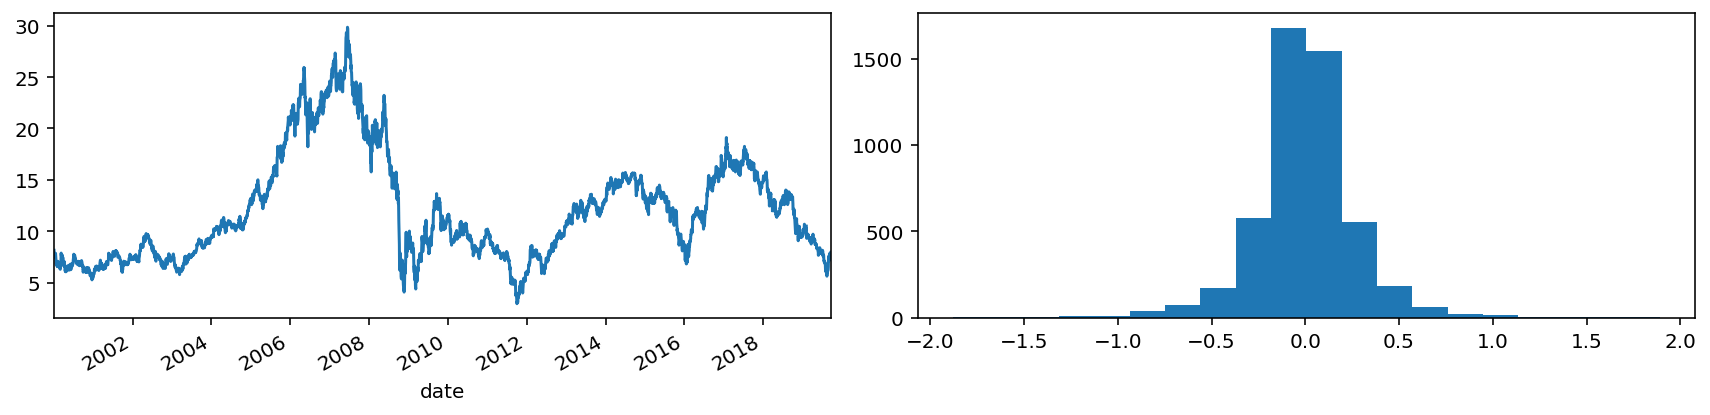

In [44]:
#Genera pandas series para el precio de cierre
cemex_close = base_CEMEX['PX_LAST']

#Cambia el index de str a datetime
date_index = pd.to_datetime(cemex_close.index)
cemex_close.index = date_index

#Genera variable diferencial 
cemex_diff = cemex_close - cemex_close.shift(periods=1)
cemex_diff


#Genera gráfico
fig, ax = plt.subplots(1,2)

cemex_close.plot(ax=ax[0])
plt.hist(cemex_diff, bins = 20)
plt.tight_layout();

---

2. Realiza un _downsampling_ de `cemex_diff`: calcula la desviación estándar por trimestre del inicio de la historia hasta el 1 de junio de 2018. Guarda la información dentro la variable `cemex_std` y grafica un histograma con `bins=20`

---

**Solución:**

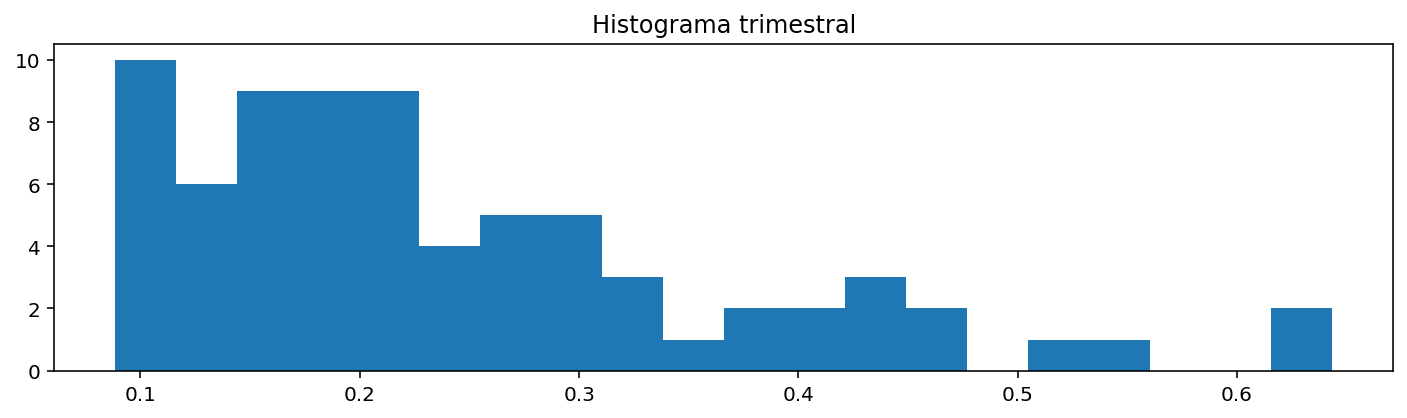

In [63]:
#Corta Serie Cemex
Periodo_tiempo_final  = "2018-06-01"

cemex_std = cemex_diff.loc[: Periodo_tiempo_final].resample("Q").std()

#Grafica desv. estándar trimestral
plt.hist(cemex_std, bins = 20)
plt.title('Histograma trimestral')
plt.show()

---

3. Realiza nuevamente el ejercicio 3 calculando en este caso la desviación estándar por semana. ¿Qué diferencias observas entre las dos distribuciones de volatilidad?

---

**Solución:**

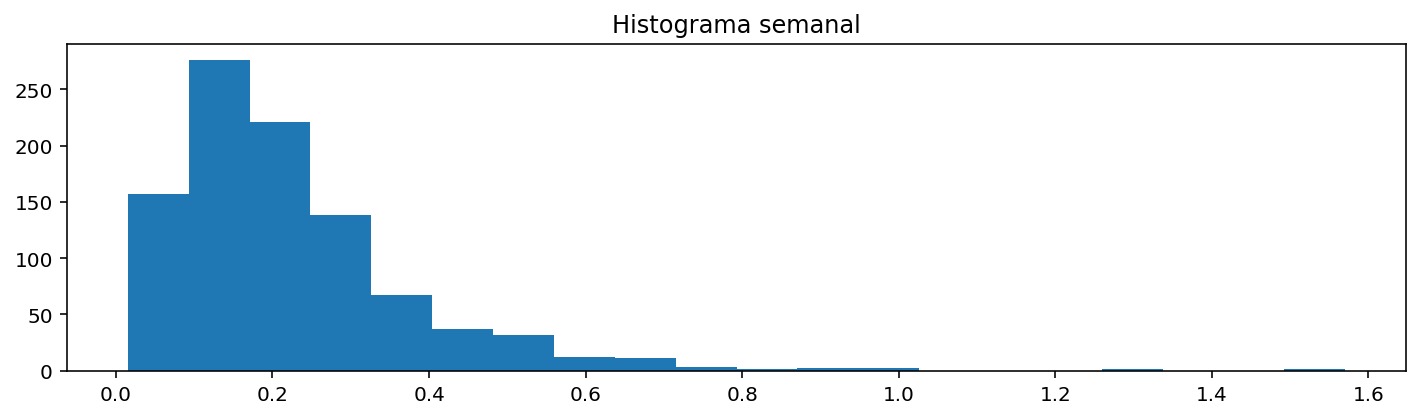

In [74]:
#Corta Serie Cemex
Periodo_tiempo_final  = "2018-06-01"

cemex_std = cemex_diff.loc[: Periodo_tiempo_final].resample("W").std()

#Grafica desv. estándar semanal
plt.hist(cemex_std, bins = 20)
plt.title('Histograma semanal')
plt.show()


La volatilidad con la periodicidad semanal tiene una caída más suave. 

---

4. En este ejercicio analizaremos la volatilidad por mes considerando `cemex_diff`. Corre el siguiente código y explica que hace:

```python
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
```

¿Cómo podrías explicar la gráfica resultante?

---

**Solución:**

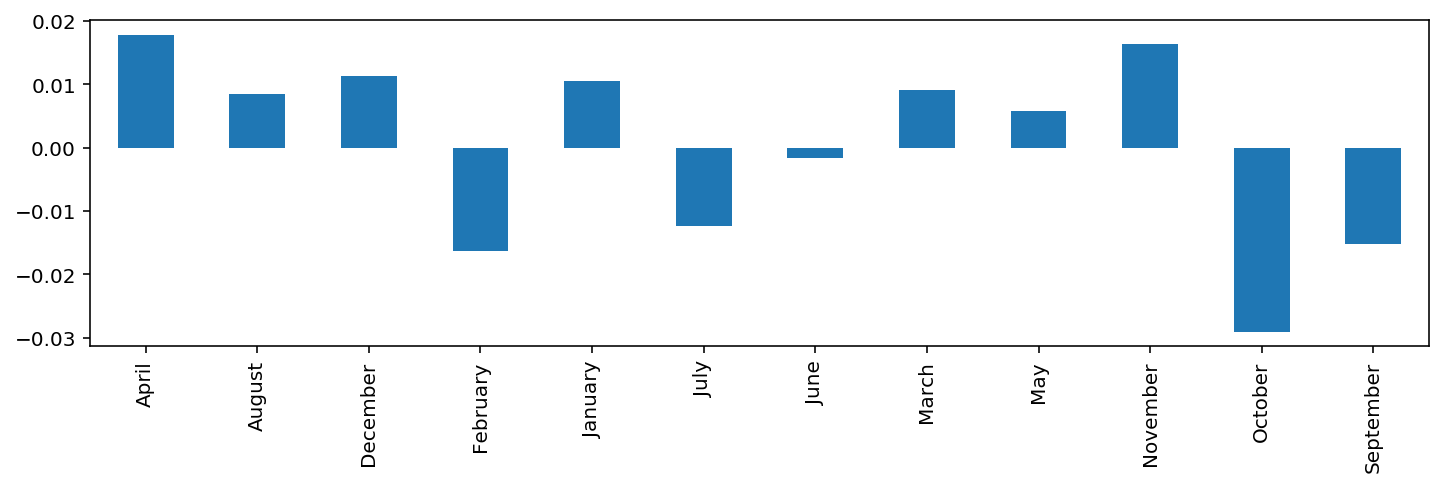

In [68]:
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")

La primera línea de código, genera un *pandas series* con el mismo tamaño que la serie "cemex_dif" con el nómbre del mes del índice para cada observación.  
La segunda línea de código genera un gráfico de barras sobre la media de un agrupado para la diferencia de precios de un día con respecto al siguiente.  
  
Sobre la gráfica, está acomodada alfabéticamente por el nombre del mes. Podemos ver cómo la gráfica mide el promedio de "diferencias" entre precios. Por lo que está en torno a 0.


---

5. Realiza nuevamente el ejercicio 4 considerando `cemexs_last`. ¿Por qué difieren las gráficas?

---

**Solución:**

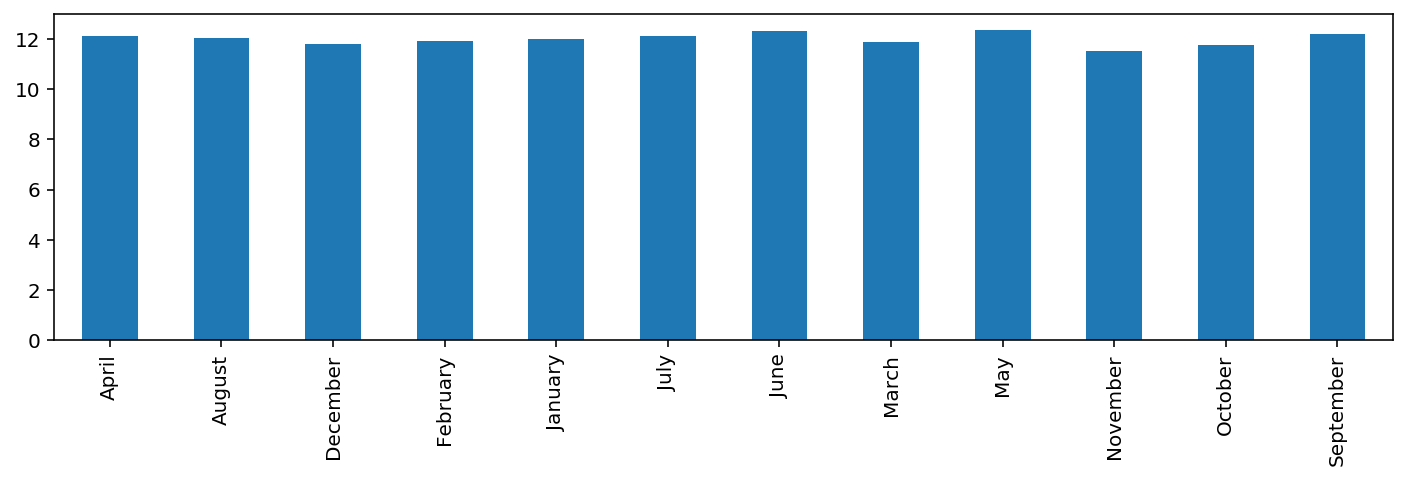

In [73]:
months = cemex_close.index.strftime("%B")
cemex_close.groupby(months).mean().plot(kind="bar")


La primer gráfica muestra las diferencia intra-precios a día vencido, mientras que la segunda diferencia muestra el promedio del precio para cada mes que la acción cotizó. 


---